In [1]:
#  !wget 'http://lfl-dsa-casestudy.s3.amazonaws.com/ImageClassification/DataSet.tar.gz'

In [2]:
#  !tar -xvf DataSet.tar.gz

In [3]:
# %tensorflow_version 1.x

In [4]:
# import tensorflow

In [5]:
import pandas as pd
import numpy as np
# import keras
import tensorflow
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Lambda

from tensorflow.keras.layers import Softmax
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import LeakyReLU

import cv2
import numpy
import glob
import pylab as plt
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm
import math

import sklearn

import pickle

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split


pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
image_labels_positions = pd.read_csv("final_data_backup_v1.csv")

In [7]:
image_labels_positions.shape

(37650, 16)

In [8]:
image_labels_positions['filename']=image_labels_positions['filename'] + '.jpg'
image_labels_positions.head()

,filename,x_min,y_min,x_max,y_max,product_type,fabric_print_type,Blouses,Dresses,Skirts,camouflage,check,floral print,leopard print,polka dot,stripe
0,2c6038d030f7e52a5798e6e5734c8ded-1.jpg,357.0,141.0,734.0,753.0,Dresses,camouflage,0,1,0,1,0,0,0,0,0
1,89583cfdcde796b219f8655388777bbb-3.jpg,68.0,297.0,1037.0,1077.0,Dresses,camouflage,0,1,0,1,0,0,0,0,0
2,2e74a5870a81c24aa7fb5c86a228cf17-1.jpg,194.0,94.0,420.0,312.0,Blouses,check,1,0,0,0,1,0,0,0,0
3,bc70bcf7735186b955cae0af6a54c5c2-2.jpg,390.0,349.0,678.0,800.0,Blouses,check,1,0,0,0,1,0,0,0,0
4,10f2c35f45d4286d361e50b08649b890-1.jpg,216.0,347.0,439.0,659.0,Blouses,check,1,0,0,0,1,0,0,0,0


In [9]:
image_names = list(image_labels_positions["filename"].values)

In [10]:
folders = glob.glob('.//Data//ImageClassification//Train//')


In [11]:
image_labels_positions['product_fabric_print_type'] = image_labels_positions['product_type']+ ' ' + image_labels_positions['fabric_print_type']
image_labels_positions.head(5)

,filename,x_min,y_min,x_max,y_max,product_type,fabric_print_type,Blouses,Dresses,Skirts,camouflage,check,floral print,leopard print,polka dot,stripe,product_fabric_print_type
0,2c6038d030f7e52a5798e6e5734c8ded-1.jpg,357.0,141.0,734.0,753.0,Dresses,camouflage,0,1,0,1,0,0,0,0,0,Dresses camouflage
1,89583cfdcde796b219f8655388777bbb-3.jpg,68.0,297.0,1037.0,1077.0,Dresses,camouflage,0,1,0,1,0,0,0,0,0,Dresses camouflage
2,2e74a5870a81c24aa7fb5c86a228cf17-1.jpg,194.0,94.0,420.0,312.0,Blouses,check,1,0,0,0,1,0,0,0,0,Blouses check
3,bc70bcf7735186b955cae0af6a54c5c2-2.jpg,390.0,349.0,678.0,800.0,Blouses,check,1,0,0,0,1,0,0,0,0,Blouses check
4,10f2c35f45d4286d361e50b08649b890-1.jpg,216.0,347.0,439.0,659.0,Blouses,check,1,0,0,0,1,0,0,0,0,Blouses check


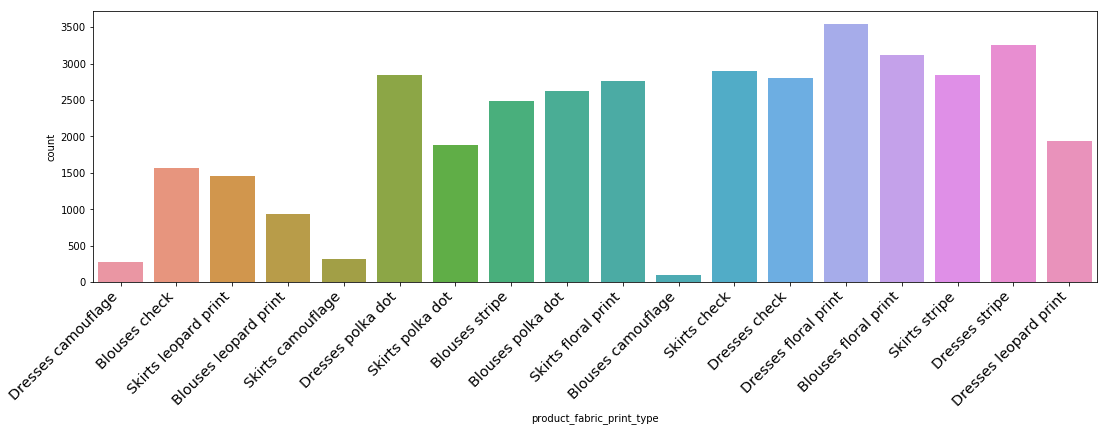

In [12]:
import seaborn as sns

plt.figure(figsize=(18,5))
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

sns.countplot(image_labels_positions['product_fabric_print_type'])



In [13]:
mergedLabels = image_labels_positions['product_fabric_print_type']
temp1 = mergedLabels.value_counts()
print(temp1)

Dresses floral print     3548
Dresses stripe           3247
Blouses floral print     3115
Skirts check             2904
Dresses polka dot        2839
Skirts stripe            2837
Dresses check            2807
Skirts floral print      2766
Blouses polka dot        2628
Blouses stripe           2493
Dresses leopard print    1935
Skirts polka dot         1881
Blouses check            1565
Skirts leopard print     1456
Blouses leopard print     932
Skirts camouflage         326
Dresses camouflage        274
Blouses camouflage         97
Name: product_fabric_print_type, dtype: int64


In [14]:
classCounts = temp1.rename_axis('class').reset_index()
classCounts.columns = ['product_fabric_print_type', 'count']
classCounts

,product_fabric_print_type,count
0,Dresses floral print,3548
1,Dresses stripe,3247
2,Blouses floral print,3115
3,Skirts check,2904
4,Dresses polka dot,2839
5,Skirts stripe,2837
6,Dresses check,2807
7,Skirts floral print,2766
8,Blouses polka dot,2628
9,Blouses stripe,2493


In [15]:
classBalanceNames = classCounts[classCounts['count']<400]['product_fabric_print_type'].values.tolist()
classBalanceNames

['Skirts camouflage', 'Dresses camouflage', 'Blouses camouflage']

In [17]:
finaldf= image_labels_positions.drop(['x_min','y_min','x_max','y_max', 'product_type', 'fabric_print_type'],axis=1)
finaldf.head()

,filename,Blouses,Dresses,Skirts,camouflage,check,floral print,leopard print,polka dot,stripe,product_fabric_print_type
0,2c6038d030f7e52a5798e6e5734c8ded-1.jpg,0,1,0,1,0,0,0,0,0,Dresses camouflage
1,89583cfdcde796b219f8655388777bbb-3.jpg,0,1,0,1,0,0,0,0,0,Dresses camouflage
2,2e74a5870a81c24aa7fb5c86a228cf17-1.jpg,1,0,0,0,1,0,0,0,0,Blouses check
3,bc70bcf7735186b955cae0af6a54c5c2-2.jpg,1,0,0,0,1,0,0,0,0,Blouses check
4,10f2c35f45d4286d361e50b08649b890-1.jpg,1,0,0,0,1,0,0,0,0,Blouses check


In [18]:
samples = finaldf.values.tolist()
print(samples[1][1:-1])
lines = samples[:500][:]
print(len(lines))

[0, 1, 0, 1, 0, 0, 0, 0, 0]
500


In [19]:
def translateImg(image, trans_range):
    translateW = trans_range*np.random.uniform()-trans_range/2
    translateH = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,translateW],[0,1,translateH]])

    shifted = cv2.warpAffine(image,Trans_M,(image.shape[1], image.shape[0]))
    return (shifted)

In [20]:
def rotateImg(img, degrees):
    (h, w) = img.shape[:2]
    (cX, cY) = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D((cX, cY), degrees, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    
    return (rotated)

def shearImg(img,shear_range):
    points1 = np.float32([[5,5],[20,5],[5,20]])
    p1 = 5+shear_range*np.random.uniform()-shear_range/2
    p2 = 20+shear_range*np.random.uniform()-shear_range/2

    points2 = np.float32([[p1,5],[p2,p1],[5,p2]])

    shearM = cv2.getAffineTransform(points1,points2)
    sheared = cv2.warpAffine(img,shearM,(img.shape[1], img.shape[0]))

    #   print ("in sheared", np.shape(sheared))
    return (sheared)

def randomFlipOrBrightness(img):
    if np.random.random()>0.5:
        finalImg = adjustBrightness(img)  
    else:
        finalImg = cv2.flip(img, 1)
    

    return (finalImg)

def gaussianBlur(img):
#     ksize= np.random.randint(1,4)
    
    blurImg = cv2.GaussianBlur(img, (5,5), 0)
    return (blurImg)

def randomizeImage(x):
    rotationMin = -20.0
    rotationMax = 20.0
    shearRange = 5
    translateRange=5

    changeType = np.random.randint(6)
    img = x

    if changeType == 0:
        # Rotate the image randomly
        degrees = np.random.uniform(rotationMin, rotationMax)
        finalImg = rotateImg(img, degrees)
    elif changeType == 1:
        # Translate the image randomly
        finalImg = translateImg(img, translateRange)
    elif changeType == 2:
        # Shear the Image
        finalImg= shearImg(img, shearRange)
    elif changeType == 3:
        # Add random Brightness to the image or Flip it
        finalImg = randomFlipOrBrightness(img)
    elif changeType == 4:
        # Add gaussian blur to de - noise image
        finalImg = gaussianBlur(img)
        
    else:
        finalImg = img
#   print ("in all", np.shape(new_x))
    return (finalImg)   

In [21]:
def preprocessClassImage(x):
    rotationMin = -20.0
    rotationMax = 20.0
    shearRange = 5
    translateRange=5

    changeType = np.random.randint(5)
    img = x

    if changeType == 0:
        degrees = np.random.uniform(rotationMin, rotationMax)
        finalImg = rotateImg(img, degrees)
    elif changeType == 1: 
        finalImg = translateImg(img, translateRange)
    elif changeType == 2: 
#     :
        finalImg= shearImg(img, shearRange)
    elif changeType == 3:
        
        finalImg = randomFlipOrBrightness(img)
    else :
        finalImg = gaussianBlur(img)

    return (finalImg)   

In [22]:
def adjustBrightness(image):
    # Convert from RGB TO HSV
    image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    # Randomly set the Brightness used to scale
    randomBrightness = 0.5+np.random.uniform()

    # Silce and scale down the third (V) channel
    image[:,:,2] = image[:,:,2]*randomBrightness

    # Convert back to RGB
    image = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)

    #   print ("in adjustBrightness", np.shape(image))
    return (image)

In [23]:

def generator(samples, batch_size=16):
    num_samples = len(samples) # Get the Length of the sample
    while 1: # Loop forever so the generator never terminates
        sklearn.utils.shuffle(samples)
      
        for offset in range(0, (num_samples//batch_size)*batch_size, batch_size):
            batch_samples = samples[offset:offset+batch_size]
    #         print ("offset == ", offset)
            category_list = ['Skirts camouflage', 'Dresses camouflage', 'Blouses camouflage']
            images=[]
            labels = []
            for batch_sample in batch_samples:
#                 current_path='.//Data//ImageClassification//Train//'+batch_sample[0]
                current_path='.//Data//Training_images_after_crop//'+batch_sample[0] 
                image = cv2.imread(current_path)
                b,g,r = cv2.split(image)       # get b,g,r
                image = cv2.merge([r,g,b]) 
#                 image = cv2.resize(image, (32,32))
                label=batch_sample[1:-1]
                if str(batch_sample[-1]) in category_list:
                    if (str(batch_sample[-1]) == 'Blouses camouflage'):
                        images.append(image)
                        
                        labels.append(label)
                        
                        rotationMin = -20.0
                        rotationMax = 20.0
                        shearRange = 5
                        translateRange = 5

                        degrees = np.random.uniform(rotationMin, rotationMax)

                        finalImage = rotateImg(image, degrees)
                        images.append(finalImage)
                        labels.append(label)
                        
                        finalImage = translateImg(image, translateRange)
                        images.append(finalImage)
                        labels.append(label)

                        finalImage= shearImg(image, shearRange)
                        images.append(finalImage)
                        labels.append(label)
                        
                        finalImage = adjustBrightness(image)  
                        images.append(finalImage)
                        labels.append(label)
                        
                        finalImage = cv2.flip(image, 1)
                        images.append(finalImage)
                        labels.append(label)
                        
                        blurImage = cv2.GaussianBlur(image, (5,5), 0)
                        images.append(blurImage)
                        labels.append(label)
                        
                    else:
                        
                        images.append(image)
                        labels.append(label)                            
                        
                        preprocessedImage = preprocessClassImage(image)
                        
                        images.append(preprocessedImage)
                        labels.append(label)

                else:
                    
                    randomizedProcessedImage= randomizeImage(image)
                    
                    images.append(randomizedProcessedImage)
                    labels.append(label)
                
                
               
            X_train = np.array(images)
            y_train = np.array(labels)
            
            X_train =  (X_train / 255.0) - 0.5
            yield ([X_train], [y_train])
        
        

In [24]:
train_samples, test_samples = train_test_split(samples, test_size=0.2)

# Further split training samples to training and validation dataset
splitIndex=math.floor(len(train_samples)*0.8)
trainData=train_samples[:splitIndex]
validationData=train_samples[splitIndex:]

In [25]:
batchSize= 32
trainGenerator=generator(trainData, batchSize)
validationGenerator=generator(validationData, batchSize)

In [26]:

from tensorflow.keras.optimizers import Adam


In [27]:
model = Sequential()

# model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape =(250,250,3)))

model.add(Conv2D(filters = 16,kernel_size = (3,3), input_shape =(250,250,3)))
model.add(Activation(LeakyReLU(alpha=0.07)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32 ,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64 ,(3,3)))
model.add(Activation(LeakyReLU(alpha=0.07)))
model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.15))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(64))
model.add(Activation(LeakyReLU(alpha=0.07)))
model.add(Dropout(0.5))

model.add(Dense(32,  activation = 'relu'))

# model.add(Dense(9 , activation = 'softmax'))

model.add(Dense(9 , activation = 'sigmoid'))

# adm = Adam(learning_rate = 1e-05)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [2]:
# model.summary()

In [29]:

from  tensorflow.keras.callbacks import EarlyStopping

In [30]:
## ************ADD EARLY STOPPING*************


callback = EarlyStopping(monitor='val_loss', patience = 5)

history = model.fit_generator(trainGenerator,
            steps_per_epoch = len(trainData)//batchSize,
            validation_data = validationGenerator,
            validation_steps = len(validationData)//batchSize,
            epochs=30, verbose=1, callbacks=[callback])                             

model.save('model_test_v7.h5')




Epoch 1/30
753/753 [==============================] - 349s 463ms/step - loss: 0.5002 - accuracy: 0.7825 - val_loss: 0.4528 - val_accuracy: 0.8037
Epoch 2/30
753/753 [==============================] - 418s 555ms/step - loss: 0.4445 - accuracy: 0.8083 - val_loss: 0.4124 - val_accuracy: 0.8196
Epoch 3/30
753/753 [==============================] - 404s 537ms/step - loss: 0.4028 - accuracy: 0.8258 - val_loss: 0.3744 - val_accuracy: 0.8352
Epoch 4/30
753/753 [==============================] - 353s 468ms/step - loss: 0.3675 - accuracy: 0.8413 - val_loss: 0.3439 - val_accuracy: 0.8503
Epoch 5/30
753/753 [==============================] - 352s 468ms/step - loss: 0.3405 - accuracy: 0.8542 - val_loss: 0.3284 - val_accuracy: 0.8590
Epoch 6/30
753/753 [==============================] - 354s 471ms/step - loss: 0.3206 - accuracy: 0.8643 - val_loss: 0.3220 - val_accuracy: 0.8634
Epoch 7/30
753/753 [==============================] - 353s 469ms/step - loss: 0.3018 - accuracy: 0.8735 - val_loss: 0.3088 -

In [31]:
# with open('history_V7.pickle', 'wb') as f:
#     pickle.dump(history.history, f)

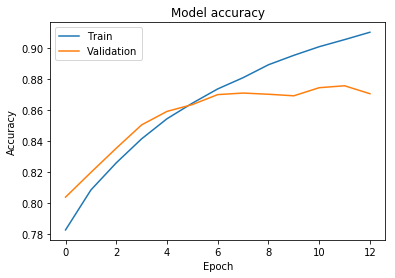

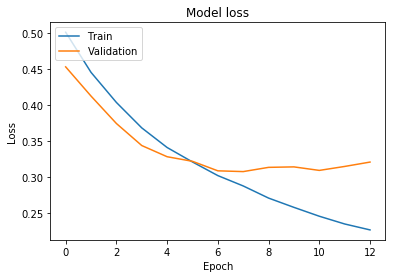

In [32]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
# model.summary()

In [34]:
# model.history

In [27]:
# from tensorflow.keras.layers import LeakyReLU
import tensorflow
model = tensorflow.keras.models.load_model('model_test_v4.h5', custom_objects={'LeakyReLU': LeakyReLU})

# model = tensorflow.keras.models.load_model('model_CE_15_epochs_64_BS_softmax_CE.h5', custom_objects={'LeakyReLU': LeakyReLU})

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 248, 248, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 32)        0

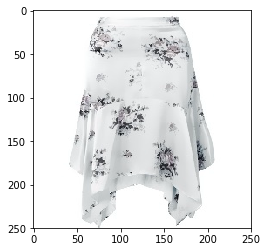

In [37]:
idx = 1520
current_path = './/Data//Training_images_after_crop//' +  test_samples[idx][0]

test = (cv2.imread(current_path, cv2.COLOR_BGR2RGB)) 

plt.imshow(test)  
plt.show()

In [38]:
# test_images[0]
idx = 3997
current_path ='.//Data//Training_images_after_crop//' +  test_samples[idx][0]
print ("test_samples[idx][0]", test_samples[idx][0])

image_test = cv2.imread(current_path, cv2.COLOR_BGR2RGB)

print (current_path)

# b,g,r = cv2.split(image_test)       # get b,g,r
# image_test = cv2.merge([r,g,b]) 
image_test = np.array(image_test)
# print (image_test)
image_test = (image_test/255.0) - 0.5
print ("===============================================")
# print (image_test)
image_test_lables = test_samples[idx][1:-1]

print ("image_test_lables" , image_test_lables)

proba_1 = model.predict(image_test.reshape(1,250,250,3))
# proba_1 = model.predict(image_test)

print ("proba_1 =", proba_1)



test_samples[idx][0] df581b09cd1d5cfca2bebb62eaf6f82a-1.jpg
.//Data//Training_images_after_crop//df581b09cd1d5cfca2bebb62eaf6f82a-1.jpg
image_test_lables [0, 1, 0, 0, 0, 0, 0, 1, 0]
proba_1 = [[4.5686960e-05 9.3129623e-01 6.6898894e-01 0.0000000e+00 0.0000000e+00
  8.9406967e-08 2.7716160e-06 1.0000000e+00 0.0000000e+00]]


In [39]:

classes = ['Blouses', 'Dresses', 'Skirts', 'camouflage', 'check', 'floral_print', 'leopard_print',\
                                  'polka_dot', 'stripe']
first_cat = classes[0:3]
second_cat = classes[3:]


first_class_prob  = proba_1[0][0:3]
ix = np.argmax(first_class_prob)
temp_1 =first_cat[ix]
temp_1

first_class_actual = image_test_lables[0:3]
first_class_actual_ix = np.argmax(first_class_actual)
temp_2 = first_cat[first_class_actual_ix]
temp_2

second_class_prob  = proba_1[0][3:]
ix = np.argmax(second_class_prob)
temp_3 = second_cat[ix]
temp_3

second_class_actual = image_test_lables[3:]
second_class_actual_ix = np.argmax(second_class_actual)
temp_4 = second_cat[second_class_actual_ix]
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print ("first_cat_actual = ", temp_2 )
print ("first_class_pred = ", temp_1 )

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print ( "second_cat_actual = ", temp_4)
print ( " second_class_pred = ", temp_3)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
first_cat_actual =  Dresses
first_class_pred =  Dresses
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
second_cat_actual =  polka_dot
 second_class_pred =  polka_dot
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual Class :  Dresses
Actual Class :  polka_dot
polka_dot (1.0)
Dresses (0.931)


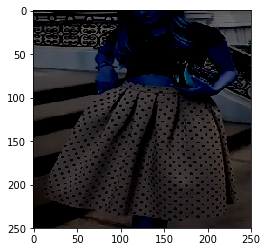

In [40]:
top_3 = np.argsort(proba_1[0])[:-4:-1]


classes = ['Blouses', 'Dresses', 'Skirts', 'camouflage', 'check', 'floral_print', 'leopard_print',\
                                  'polka_dot', 'stripe']


for i in range(len(image_test_lables)):
    if (image_test_lables[i] == 1):
        print ("Actual Class : ", classes[i] )
        
for i in range(2):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba_1[0][top_3[i]]))

plt.imshow(image_test)
plt.show()



In [29]:
test_images = []
test_labels = []
for batch_sample in test_samples:
#                 current_path='.//Data//ImageClassification//Train//'+batch_sample[0]
    current_path='.//Data//Training_images_after_crop//' + batch_sample[0] 
    image = cv2.imread(current_path)
    b,g,r = cv2.split(image)       # get b,g,r
    image = cv2.merge([r,g,b]) 
#     image = cv2.resize(image_test, (250, 250))
    
    label=batch_sample[1:-1]
    
    
    test_images.append(image)
    test_labels.append(label)

test_images = np.array(test_images)
test_labels =  np.array(test_labels)
    
print (len(test_images))
print (len(test_labels))



7530
7530


In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.74535924


In [32]:
test_samples[1][1:-1]

[0, 1, 0, 0, 0, 0, 0, 1, 0]

In [33]:

classes = ['Blouses', 'Dresses', 'Skirts', 'camouflage', 'check', 'floral_print', 'leopard_print',\
                                  'polka_dot', 'stripe']

first_cat = classes[0:3]
second_cat = classes[3:]

test_images = []
test_labels = []


product_type_actual = []
product_type_pred = []


fabric_print_type_actual = []
fabric_print_type_pred = []

i = 0
for batch_sample in test_samples:
#     print (i)
    
    current_path='.//Data//Training_images_after_crop//' + batch_sample[0] 
    
    image = cv2.imread(current_path)
    b,g,r = cv2.split(image)       # get b,g,r
    image = cv2.merge([r,g,b]) 
#     image = cv2.resize(image_test, (250, 250))
    
    image = (image/255.0) - 0.5
    image_test_lables = test_samples[1:-1]

    proba_11 = model.predict(image.reshape(1,250,250,3))

    label = batch_sample[1:-1]
    
    first_class_actual = label[0:3]
    first_class_actual_ix = np.argmax(first_class_actual)
    temp_2 = first_cat[first_class_actual_ix]
    
#     print (first_class_actual_ix)

    first_class_prob  = proba_11[0][0:3]
    first_class_prob_ix = np.argmax(first_class_prob)
#     print (first_class_prob_ix)
    temp_1 = first_cat[first_class_prob_ix]
    
    product_type_actual.append(first_class_actual_ix)
    product_type_pred.append(first_class_prob_ix)
#     print (temp_1)

    second_class_actual = label[3:]
    second_class_actual_ix = np.argmax(second_class_actual)
    temp_4 = second_cat[second_class_actual_ix]
      
    second_class_prob  = proba_11[0][3:]
    second_class_prob_ix = np.argmax(second_class_prob)
    temp_3 = second_cat[second_class_prob_ix]

    fabric_print_type_actual.append(second_class_actual_ix)
    fabric_print_type_pred.append(second_class_prob_ix)
    
    if (i % 500 == 0):
        print (i)
    
    i += 1   


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500


In [34]:
print (len(product_type_actual))

print (len(product_type_pred))

7530
7530


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
# accuracy_score(y_true, y_pred)

accuracy_score(product_type_actual, product_type_pred)

0.9073041168658699

In [37]:
accuracy_score(fabric_print_type_actual, fabric_print_type_pred)

0.8393094289508632

In [38]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(product_type_actual, product_type_pred)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print ("product_type_precision = ", precision)
print ("product_type_recall = ", recall)

product_type_precision =  [0.93493976 0.91147656 0.8806315 ]
product_type_recall =  [0.88422972 0.90671772 0.92854243]


In [39]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(fabric_print_type_actual, fabric_print_type_pred)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print (cm)
print ("fabric_print_type_precision = ", precision)
print ("fabric_print_type_recall = ", recall)

[[ 114   12   11    3    2    8]
 [   2 1248   35   24   35   95]
 [   5  119 1475  115  114   76]
 [   2   33   46  743   44   11]
 [   3   61   67   34 1206   61]
 [   1  121   26    7   37 1534]]
fabric_print_type_precision =  [0.8976378  0.78293601 0.88855422 0.80237581 0.83866481 0.85938375]
fabric_print_type_recall =  [0.76       0.86726894 0.77468487 0.84527873 0.84217877 0.88876014]


In [40]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score


In [41]:
# precision_recall_fscore_support(y_true, y_pred, average='micro')
precision_recall_fscore_support(product_type_actual, product_type_pred, average='micro')

(0.9073041168658699, 0.9073041168658699, 0.9073041168658699, None)

In [42]:
precision_recall_fscore_support(fabric_print_type_actual, fabric_print_type_pred, average='micro')

(0.8393094289508632, 0.8393094289508632, 0.8393094289508632, None)

In [43]:
precision_recall_fscore_support(product_type_actual, product_type_pred, average='macro')

(0.9090159379837354, 0.9064966206723346, 0.9073071452093114, None)

In [44]:
precision_recall_fscore_support(fabric_print_type_actual, fabric_print_type_pred, average='macro')

(0.8449253996427547, 0.8296952410892614, 0.8352143114047564, None)

In [45]:
from sklearn.metrics import precision_recall_fscore_support as score


precision, recall, fscore, support = score(product_type_actual, product_type_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.93493976 0.91147656 0.8806315 ]
recall: [0.88422972 0.90671772 0.92854243]
fscore: [0.90887796 0.90909091 0.90395257]
support: [2194 2873 2463]


In [46]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(fabric_print_type_actual, fabric_print_type_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.8976378  0.78293601 0.88855422 0.80237581 0.83866481 0.85938375]
recall: [0.76       0.86726894 0.77468487 0.84527873 0.84217877 0.88876014]
fscore: [0.82310469 0.82294758 0.82772166 0.8232687  0.84041812 0.87382512]
support: [ 150 1439 1904  879 1432 1726]


In [47]:
from sklearn.metrics import classification_report

print(classification_report(product_type_actual, product_type_pred))

             precision    recall  f1-score   support

          0       0.93      0.88      0.91      2194
          1       0.91      0.91      0.91      2873
          2       0.88      0.93      0.90      2463

avg / total       0.91      0.91      0.91      7530



In [48]:
from sklearn.metrics import classification_report

print(classification_report(fabric_print_type_actual, fabric_print_type_pred))

             precision    recall  f1-score   support

          0       0.90      0.76      0.82       150
          1       0.78      0.87      0.82      1439
          2       0.89      0.77      0.83      1904
          3       0.80      0.85      0.82       879
          4       0.84      0.84      0.84      1432
          5       0.86      0.89      0.87      1726

avg / total       0.84      0.84      0.84      7530

